In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-09-10 16:56:19 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-09-10 16:56:19 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=7, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-09-10 16:56:19 __main__ INFO     transformers.__version__='4.55.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
# model_key = "meta-llama/Llama-3.1-70B-Instruct"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

2025-09-10 16:56:23 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks/checking_head_generalization, stdin=None, shell=False, universal_newlines=False)
2025-09-10 16:56:23 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks/checking_head_generalization, stdin=None, shell=False, universal_newlines=False)
2025-09-10 16:56:23 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-09-10 16:56:23 wandb.docker.auth DEBUG    No config file found


In [4]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
    attn_implementation="eager",
)

2025-09-10 16:56:25 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-09-10 16:56:25 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-09-10 16:56:25 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-09-10 16:56:25 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0
2025-09-10 16:56:25 urllib3.connectionpool DEBUG    https://huggingface.co:443 "GET /api/models/meta-llama/Llama-3.3-70B-Instruct/tree/main/additional_chat_templates?recursive=False&expand=False HTTP/1.1" 404 64


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-09-10 16:57:10 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-09-10 16:57:10 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/custom_generate/generate.py HTTP/1.1" 404 0
2025-09-10 16:57:10 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [8]:
from src.selection.data import SelectOneTask, CountingTask

#################################################################################
# TASK_CLS = SelectOneTask
# prompt_template_idx = 3
TASK_CLS = CountingTask
prompt_template_idx = 1
N_DISTRACTORS = 5
OPTION_STYLE = "single_line"
#################################################################################

select_task = TASK_CLS.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        # "profession.json"
        # "nationality.json"
        "objects.json"
    )
)

print(select_task)

CountingTask: (different objects)
Categories: fruit(15), vehicle(15), furniture(15), animal(15), music instrument(15), clothing(15), electronics(15), sport equipment(15), kitchen appliance(15), vegetable(14), building(15), office supply(15), bathroom item(15), flower(15), tree(15), jewelry(15)


In [9]:
sample = select_task.get_random_sample(
    mt = mt,
    option_style=OPTION_STYLE,
    prompt_template_idx=prompt_template_idx,
    # category="actor",
    # category="Brazil"
    category="fruit",
    filter_by_lm_prediction=False,
)

print(sample.prompt(), ">>", f'"{mt.tokenizer.decode([sample.ans_token_id])}"')

Items: Marigold, Pineapple, Tape, Watermelon, Orchid
How many fruits are in this list?
Answer: >> " Two"


## Loading the heads

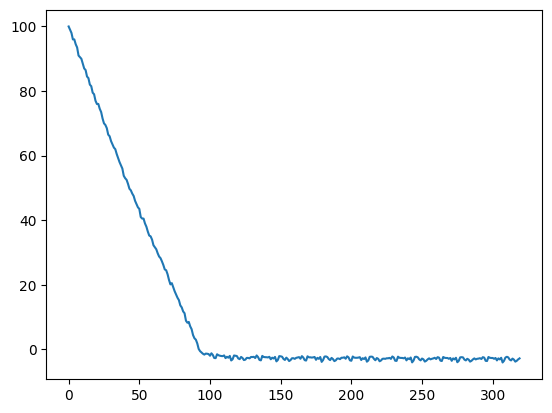

In [10]:
from matplotlib import pyplot as plt
import numpy as np

# optimized_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "selection/optimized_backup_heads",
#     mt.name.split("/")[-1],
#     f"{select_task.task_name}.npz"
# )

# optimized_path = os.path.join(
#     env_utils.DEFAULT_RESULTS_DIR,
#     "selection/optimized_heads",
#     model_key.split("/")[-1],
#     "distinct_options",
#     # f"{select_task.task_name}",
#     "select_one",
#     # "legacy",
#     "epoch_10.npz"
# )

optimized_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "test_opt_code",
    model_key.split("/")[-1],
    "distinct_options",
    f"{select_task.task_name}",
    "legacy",
    "epoch_10.npz"
)

optimization_results = np.load(optimized_path, allow_pickle=True)
plt.plot(optimization_results["losses"])
plt.show()

62


(True, True)

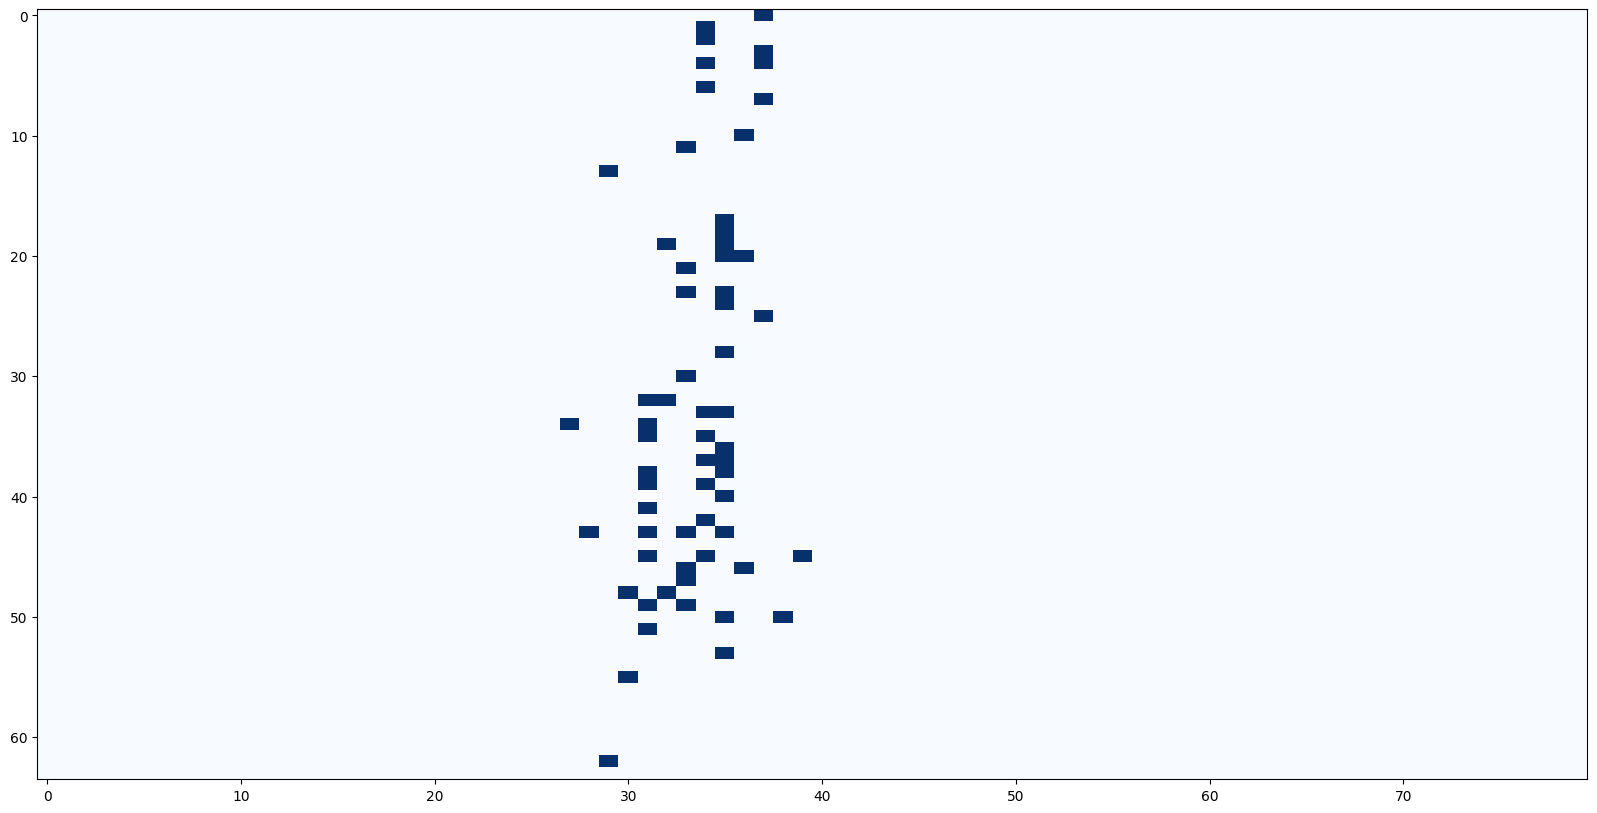

In [11]:
plt.figure(figsize=(20, 10))

optimal_head_mask = torch.tensor(optimization_results["optimal_mask"]).to(torch.float32)
optimal_head_mask[52:, :] = 0.0

plt.imshow(
    optimal_head_mask.T.numpy(),
    cmap="Blues",
    aspect="auto",
    vmin=0,
    vmax=1,
)

optimized_heads = torch.nonzero(optimal_head_mask > 0.5, as_tuple=False).tolist()
optimized_heads = [
    (layer_idx, head_idx) for layer_idx, head_idx in optimized_heads
]
print(len(optimized_heads))

HEADS = optimized_heads

(35, 19) in HEADS, (35, 19) in optimized_heads
# [(29, 3) in HEADS]

In [12]:
from src.attention import get_attention_matrices
from src.selection.functional import (
    verify_head_patterns,
    get_patches_to_verify_independent_enrichment,
)

attn_pattern = verify_head_patterns(
    prompt=sample.prompt(option_style="single_line"),
    options=sample.options,
    mt=mt,
    heads=optimized_heads,
    # heads = HEADS,
    # heads = [(35, 19)],
    start_from=1
)

2025-09-10 16:58:24 src.selection.functional DEBUG    Predictions: ['" "[220] (p=0.469, logit=21.625)', '" There"[2684] (p=0.252, logit=21.000)', '" Two"[9220] (p=0.152, logit=20.500)', '" Three"[14853] (p=0.063, logit=19.625)', '" Only"[8442] (p=0.013, logit=18.000)']
2025-09-10 16:58:24 src.selection.functional INFO     Combined attention matrix for all heads


# Validating Against Other Reduce Tasks

## SelectOne Task

In [13]:
from src.selection.data import SelectionSample, SelectOneTask

select_one_task = SelectOneTask.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        "objects.json"
    )
)
print(select_one_task)

SelectOneTask: (different objects)
Categories: fruit(15), vehicle(15), furniture(15), animal(15), music instrument(15), clothing(15), electronics(15), sport equipment(15), kitchen appliance(15), vegetable(14), building(15), office supply(15), bathroom item(15), flower(15), tree(15), jewelry(15)



In [15]:
test_sample = select_one_task.get_random_sample(
    mt = mt,
    option_style=OPTION_STYLE,
    prompt_template_idx=3,
    category="fruit",
    filter_by_lm_prediction=True,
)
print(test_sample.prompt(), ">>", f'"{mt.tokenizer.decode([test_sample.ans_token_id])}"')
test_sample.prediction

Options: Football, Airplane, Lettuce, Giraffe, Plum, Dishwasher.
Which among these objects mentioned above is a fruit?
Answer: >> " Plum"


[PredictedToken(token=' Plum', prob=0.76171875, logit=21.5, token_id=84409, metadata=None),
 PredictedToken(token=' The', prob=0.0908203125, logit=19.375, token_id=578, metadata=None),
 PredictedToken(token=' Among', prob=0.05517578125, logit=18.875, token_id=22395, metadata=None),
 PredictedToken(token=' A', prob=0.048828125, logit=18.75, token_id=362, metadata=None),
 PredictedToken(token=' PL', prob=0.004547119140625, logit=16.375, token_id=10528, metadata=None)]

In [16]:
attn_pattern = verify_head_patterns(
    prompt=test_sample.prompt(option_style="single_line"),
    options=test_sample.options,
    mt=mt,
    heads=optimized_heads,
    # heads = HEADS,
    # heads = [(35, 19)],
    start_from=1
)

2025-09-10 16:59:54 src.selection.functional DEBUG    Predictions: ['" Plum"[84409] (p=0.762, logit=21.500)', '" The"[578] (p=0.091, logit=19.375)', '" Among"[22395] (p=0.055, logit=18.875)', '" A"[362] (p=0.049, logit=18.750)', '" PL"[10528] (p=0.005, logit=16.375)']
2025-09-10 16:59:54 src.selection.functional INFO     Combined attention matrix for all heads


In [31]:
from src.selection.data import CounterFactualSamplePair
from src.functional import free_gpu_cache
from src.selection.data import get_counterfactual_samples_interface

validation_samples_save_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "training",
    mt.name.split("/")[-1],
    select_one_task.task_name,
    "objects",
)

os.makedirs(validation_samples_save_path, exist_ok=True)


free_gpu_cache()
validation_set = []
validation_limit = 256

counterfactual_sampler = get_counterfactual_samples_interface[select_one_task.task_name]

while len(validation_set) < validation_limit:
    print(f"sample {len(validation_set)+1} / {validation_limit}")
    patch, clean = counterfactual_sampler(
        mt=mt,
        task=select_one_task,
        filter_by_lm_prediction=True,
        prompt_template_idx=3,
        option_style=OPTION_STYLE,
        n_distractors=5,
    )
    validation_set.append((clean, patch))
    cf_pair = CounterFactualSamplePair(
        patch_sample=patch,
        clean_sample=clean,
    )
    cf_pair.detensorize()
    with open(
        os.path.join(validation_samples_save_path, f"{len(validation_set):05d}.json"),
        "w",
    ) as f:
        json.dump(cf_pair.to_dict(), f, indent=2)

len(validation_set)

sample 1 / 256
2025-09-10 17:05:45 src.selection.data INFO     clean_obj_idx=4 | ['Sheep', 'Spruce', 'Bracelet', 'Kiwi', 'Toilet', 'Coffee table']
type(task)=<class 'src.selection.data.SelectOneTask'>
2025-09-10 17:05:45 src.selection.data INFO     Options: Sheep, Spruce, Bracelet, Kiwi, Toilet, Coffee table.
Which among these objects mentioned above is a tree?
Answer:
2025-09-10 17:05:45 src.selection.data INFO     Bamboo | tree -> Spruce | pred=['" Spr"[15883] (p=0.898, logit=22.375)', '" Among"[22395] (p=0.035, logit=19.125)', '" The"[578] (p=0.035, logit=19.125)', '" A"[362] (p=0.010, logit=17.875)', '" It"[1102] (p=0.003, logit=16.750)']
2025-09-10 17:05:46 src.selection.data INFO     Options: Sheep, Spruce, Bracelet, Kiwi, Toilet, Coffee table.
Which among these objects mentioned above is a bathroom item?
Answer:
2025-09-10 17:05:46 src.selection.data INFO     Razor | bathroom item -> Toilet | pred=['" Toilet"[82994] (p=0.793, logit=21.125)', '" The"[578] (p=0.065, logit=18.625)'

256

In [32]:
from src.selection.optimization import validate_q_proj_ie_on_sample_pair

clean, patch = validation_set[15]
val_sample_result = validate_q_proj_ie_on_sample_pair(
    mt=mt,
    clean_sample=clean,
    patch_sample=patch,
    heads=optimized_heads,
    query_indices={-2: -2, -1: -1},
    add_ques_pos_to_query_indices=True,
    verify_head_behavior_on=-1,
)

clean_obj = clean.ans_token_id
target_obj = clean.metadata["track_type_obj_token_id"]

logger.debug(f"clean obj: {mt.tokenizer.decode(clean_obj)}")
logger.debug(f"target obj: {mt.tokenizer.decode(target_obj)}")

before_intervention = {
    "clean_rank": val_sample_result["clean_track"][clean_obj][0],
    "clean_logit": val_sample_result["clean_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["clean_track"][target_obj][0],
    "target_logit": val_sample_result["clean_track"][target_obj][1].logit,
}

after_intervention = {
    "clean_rank": val_sample_result["int_track"][clean_obj][0],
    "clean_logit": val_sample_result["int_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["int_track"][target_obj][0],
    "target_logit": val_sample_result["int_track"][target_obj][1].logit,
}

clean_rank_delta = after_intervention["clean_rank"] - before_intervention["clean_rank"]
target_rank_delta = (
    after_intervention["target_rank"] - before_intervention["target_rank"]
)
logger.info(
    f"Clean Prediction Rank Change: {before_intervention['clean_rank']} -> {after_intervention['clean_rank']} | Delta: {clean_rank_delta} "
)
logger.info(
    f"Target Prediction Rank Change: {before_intervention['target_rank']} -> {after_intervention['target_rank']} | Delta: {target_rank_delta} "
)

clean_logit_delta = (
    after_intervention["clean_logit"] - before_intervention["clean_logit"]
)
target_logit_delta = (
    after_intervention["target_logit"] - before_intervention["target_logit"]
)
logger.info(
    f"Clean Prediction Logit Change: {before_intervention['clean_logit']:.4f} -> {after_intervention['clean_logit']:.4f} | Delta: {clean_logit_delta:.4f} "
)
logger.info(
    f"Target Prediction Logit Change: {before_intervention['target_logit']:.4f} -> {after_intervention['target_logit']:.4f} | Delta: {target_logit_delta:.4f} "
)

2025-09-10 17:16:10 src.selection.optimization INFO     Verifying head behavior...
2025-09-10 17:16:10 src.selection.optimization INFO     Clean Sample >> Ans:  Ottoman


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-09-10 17:16:14 src.selection.functional DEBUG    Generated full answer: " Ottoman. 
Explanation: Ottoman is a type of furniture, which is a piece of furniture with a cushioned seat and back, often used as a"
2025-09-10 17:16:14 src.selection.functional DEBUG    Predictions: ['" Ottoman"[70110] (p=0.852, logit=21.500)', '" An"[1556] (p=0.037, logit=18.375)', '" Among"[22395] (p=0.033, logit=18.250)', '" The"[578] (p=0.033, logit=18.250)', '" It"[1102] (p=0.005, logit=16.375)']
2025-09-10 17:16:14 src.selection.functional INFO     Combined attention matrix for all heads


2025-09-10 17:16:14 src.selection.optimization INFO     Patch Sample >> Ans:  Notebook


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-09-10 17:16:18 src.selection.functional DEBUG    Generated full answer: " Notebook. A notebook is a type of office supply used for writing and note-taking. The other options are not typically considered office supplies. Lily is a"
2025-09-10 17:16:18 src.selection.functional DEBUG    Predictions: ['" Notebook"[69755] (p=0.816, logit=21.125)', '" The"[578] (p=0.052, logit=18.375)', '" A"[362] (p=0.046, logit=18.250)', '" Among"[22395] (p=0.032, logit=17.875)', '" Note"[7181] (p=0.006, logit=16.250)']
2025-09-10 17:16:18 src.selection.functional INFO     Combined attention matrix for all heads


2025-09-10 17:16:19 src.selection.optimization INFO     Caching the query states for the 62 heads
2025-09-10 17:16:19 src.selection.optimization INFO     patch_prediction=['" Notebook"[69755] (p=0.816, logit=21.125)', '" The"[578] (p=0.052, logit=18.375)', '" A"[362] (p=0.046, logit=18.250)', '" Among"[22395] (p=0.032, logit=17.875)', '" Note"[7181] (p=0.006, logit=16.250)']
2025-09-10 17:16:19 src.selection.optimization INFO     clean run
2025-09-10 17:16:19 src.selection.optimization INFO     clean_prediction=['" Ottoman"[70110] (p=0.852, logit=21.500)', '" An"[1556] (p=0.037, logit=18.375)', '" Among"[22395] (p=0.033, logit=18.250)', '" The"[578] (p=0.033, logit=18.250)', '" It"[1102] (p=0.005, logit=16.375)']
2025-09-10 17:16:19 src.selection.optimization INFO     clean_track=OrderedDict([(70110, (1, PredictedToken(token=' Ottoman', prob=0.8515625, logit=21.5, token_id=70110, metadata=None))), (69755, (14, PredictedToken(token=' Notebook', prob=0.0012054443359375, logit=14.9375, to

2025-09-10 17:16:19 src.selection.optimization INFO     int_prediction=['" Notebook"[69755] (p=0.797, logit=21.625)', '" A"[362] (p=0.065, logit=19.125)', '" The"[578] (p=0.045, logit=18.750)', '" Among"[22395] (p=0.024, logit=18.125)', '" Bro"[6031] (p=0.024, logit=18.125)']
2025-09-10 17:16:19 src.selection.optimization INFO     int_track=OrderedDict([(69755, (1, PredictedToken(token=' Notebook', prob=0.796875, logit=21.625, token_id=69755, metadata=None))), (6031, (5, PredictedToken(token=' Bro', prob=0.0240478515625, logit=18.125, token_id=6031, metadata=None))), (48390, (9, PredictedToken(token=' Lily', prob=0.001861572265625, logit=15.5625, token_id=48390, metadata=None))), (70110, (16, PredictedToken(token=' Ottoman', prob=0.000934600830078125, logit=14.875, token_id=70110, metadata=None))), (49268, (241, PredictedToken(token=' Dish', prob=4.6193599700927734e-06, logit=9.5625, token_id=49268, metadata=None))), (67553, (900, PredictedToken(token=' Pants', prob=5.848705768585205e-

In [33]:
from tqdm.auto import tqdm

validation_results = []

for clean_sample, patch_sample in tqdm(validation_set):
    val_sample_result = validate_q_proj_ie_on_sample_pair(
        mt=mt,
        clean_sample=clean_sample,
        patch_sample=patch_sample,
        heads=optimized_heads,
        query_indices={-2: -2, -1: -1},
        add_ques_pos_to_query_indices=True,
    )
    validation_results.append(val_sample_result)
    print("=" * 80)

  0%|          | 0/256 [00:00<?, ?it/s]

2025-09-10 17:16:20 src.selection.optimization INFO     Caching the query states for the 62 heads
2025-09-10 17:16:20 src.selection.optimization INFO     patch_prediction=['" Spr"[15883] (p=0.898, logit=22.375)', '" Among"[22395] (p=0.035, logit=19.125)', '" The"[578] (p=0.035, logit=19.125)', '" A"[362] (p=0.010, logit=17.875)', '" It"[1102] (p=0.003, logit=16.750)']
2025-09-10 17:16:20 src.selection.optimization INFO     clean run
2025-09-10 17:16:20 src.selection.optimization INFO     clean_prediction=['" Toilet"[82994] (p=0.793, logit=21.125)', '" The"[578] (p=0.065, logit=18.625)', '" Among"[22395] (p=0.057, logit=18.500)', '" A"[362] (p=0.027, logit=17.750)', '" Option"[7104] (p=0.007, logit=16.375)']
2025-09-10 17:16:20 src.selection.optimization INFO     clean_track=OrderedDict([(82994, (1, PredictedToken(token=' Toilet', prob=0.79296875, logit=21.125, token_id=82994, metadata=None))), (15883, (14, PredictedToken(token=' Spr', prob=0.0012664794921875, logit=14.6875, token_id=15

In [34]:
before_intervention = []
after_intervention = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]

    clean_obj = clean_sample.ans_token_id
    target_obj = clean_sample.metadata["track_type_obj_token_id"]

    before_intervention.append({
        "clean_rank": intervention_result["clean_track"][clean_obj][0],
        "clean_logit": intervention_result["clean_track"][clean_obj][1].logit,
        "target_rank": intervention_result["clean_track"][target_obj][0],
        "target_logit": intervention_result["clean_track"][target_obj][1].logit,
    })

    after_intervention.append({
        "clean_rank": intervention_result["int_track"][clean_obj][0],
        "clean_logit": intervention_result["int_track"][clean_obj][1].logit,
        "target_rank": intervention_result["int_track"][target_obj][0],
        "target_logit": intervention_result["int_track"][target_obj][1].logit,
    })

In [35]:
import numpy as np

clean_rank_delta = [
    after["clean_rank"] - before["clean_rank"]
    for before, after in zip(before_intervention, after_intervention)
]
target_rank_delta = [
    after["target_rank"] - before["target_rank"]
    for before, after in zip(before_intervention, after_intervention)
]

clean_rank_delta, target_rank_delta = np.array(clean_rank_delta), np.array(
    target_rank_delta
)
print(f"clean_rank_delta: {clean_rank_delta.mean():.4f} ± {clean_rank_delta.std():.4f}")
print(
    f"target_rank_delta: {target_rank_delta.mean():.4f} ± {target_rank_delta.std():.4f}"
)

clean_rank_after_intervention = [after["clean_rank"] for after in after_intervention]
clean_rank_after_intervention = np.array(clean_rank_after_intervention)
print(
    f"clean_rank_after_intervention: {clean_rank_after_intervention.mean():.4f} ± {clean_rank_after_intervention.std():.4f}"
)

target_rank_after_intervention = [after["target_rank"] for after in after_intervention]
target_rank_after_intervention = np.array(target_rank_after_intervention)
print(
    f"target_rank_after_intervention: {target_rank_after_intervention.mean():.4f} ± {target_rank_after_intervention.std():.4f}"
)

clean_rank_delta: 12.1992 ± 22.2676
target_rank_delta: -212.1445 ± 396.6817
clean_rank_after_intervention: 13.2109 ± 22.2618
target_rank_after_intervention: 1.5430 ± 2.3910


In [36]:
clean_logit_delta = [
    after["clean_logit"] - before["clean_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
target_logit_delta = [
    after["target_logit"] - before["target_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
clean_logit_delta, target_logit_delta = np.array(clean_logit_delta), np.array(target_logit_delta)
print(f"clean_logit_delta: {clean_logit_delta.mean():.4f} ± {clean_logit_delta.std():.4f}")
print(f"target_logit_delta: {target_logit_delta.mean():.4f} ± {target_logit_delta.std():.4f}")

clean_logit_after_intervention = [
    after["clean_logit"]
    for after in after_intervention
]
clean_logit_after_intervention = np.array(clean_logit_after_intervention)
print(f"clean_logit_after_intervention: {clean_logit_after_intervention.mean():.4f} ± {clean_logit_after_intervention.std():.4f}")

target_logit_after_intervention = [
    after["target_logit"]
    for after in after_intervention
]
target_logit_after_intervention = np.array(target_logit_after_intervention)
print(f"target_logit_after_intervention: {target_logit_after_intervention.mean():.4f} ± {target_logit_after_intervention.std():.4f}")

clean_logit_delta: -4.8857 ± 2.3423
target_logit_delta: 8.5078 ± 2.7750
clean_logit_after_intervention: 16.6870 ± 2.3786
target_logit_after_intervention: 20.2625 ± 1.4013


In [37]:
top_1 = sum([1 for after in after_intervention if after["target_rank"] == 1])
top_1 / len(after_intervention)

0.828125

In [ ]:
counter_patch_type_top_option = 0
failed_cases = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]
    int_track = intervention_result["int_track"]
    clean_track = intervention_result["clean_track"]
    if (
        int_track[list(int_track.keys())[0]][1].token_id
        == clean_sample.metadata["track_type_obj_token_id"]
    ): 
        counter_patch_type_top_option += 1
    else:
        failed_cases.append(
            {
                "clean_sample": clean_sample,
                "patch_sample": patch_sample,
                "int_track": int_track,
                "clean_track": clean_track,
            }
        )

top_1_accuracy = counter_patch_type_top_option / len(validation_results)
print("=" * 80)
print(
    f"Counterfactual patching accuracy: {top_1_accuracy:.4f} ({counter_patch_type_top_option}/{len(validation_results)})"
)
print("=" * 80)
print(f"{len(failed_cases)}")

Counterfactual patching accuracy: 0.8477 (217/256)
39


In [39]:
for failed_case in failed_cases:
    clean_sample = failed_case["clean_sample"]
    patch_sample = failed_case["patch_sample"]
    int_track = failed_case["int_track"]
    clean_track = failed_case["clean_track"]

    print("Clean Sample:")
    print(clean_sample.prompt(), ">>", f'"{mt.tokenizer.decode([clean_sample.ans_token_id])}"')

    print("-" * 100)
    print(
        "Track: ",
        " | Token"
        f"\"{mt.tokenizer.decode(clean_sample.metadata['track_type_obj_token_id'])}\"",
    )
    print("Clean:", f"(Token: {mt.tokenizer.decode(clean_sample.ans_token_id)})")
    print("-" * 100)

    clean_track = [pred for tok_id, (rank, pred) in clean_track.items()]
    print(f"Clean Track: {json.dumps([str(pred) for pred in clean_track], indent=4)}")

    int_track = [pred for tok_id, (rank, pred) in int_track.items()]
    print(
        f"Intervened Track: {json.dumps([str(pred) for pred in int_track], indent=4)}"
    )
    print("=" * 100)

Clean Sample:
Options: Blender, Television, Watch, Guitar, Ottoman, Shampoo.
Which among these objects mentioned above is a music instrument?
Answer: >> " Guitar"
----------------------------------------------------------------------------------------------------
Track:   | Token" Watch"
Clean: (Token:  Guitar)
----------------------------------------------------------------------------------------------------
Clean Track: [
    "\" Guitar\"[47759] (p=0.609, logit=21.500)",
    "\" Blender\"[88668] (p=0.000, logit=13.375)",
    "\" Sh\"[1443] (p=0.000, logit=12.500)",
    "\" Watch\"[10573] (p=0.000, logit=11.000)",
    "\" Ottoman\"[70110] (p=0.000, logit=10.062)",
    "\" Television\"[41445] (p=0.000, logit=9.375)"
]
Intervened Track: [
    "\" Guitar\"[47759] (p=0.381, logit=19.625)",
    "\" Sh\"[1443] (p=0.021, logit=16.750)",
    "\" Ottoman\"[70110] (p=0.013, logit=16.250)",
    "\" Watch\"[10573] (p=0.010, logit=16.000)",
    "\" Blender\"[88668] (p=0.000, logit=12.750)",
    "

## SelectFirst Task

In [74]:
from src.selection.data import SelectionSample, SelectFirstTask

select_first_task = SelectFirstTask.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        "objects.json"
    )
)
print(select_first_task)

{'name': 'different objects', 'prompt_templates': ['Which object from the following list shares its category with <_pivot_entity_>?\n<_options_>\nAnswer:', '<_options_>\nWhich among these objects mentioned above share the same category as <_pivot_entity_>?\nAnswer:', 'Which object from the following list is a <_category_>?\n<_options_>\nAnswer:', '<_options_>\nWhich among these objects mentioned above is a <_category_>?\nAnswer:'], 'odd_one_prompt_templates': ['Which object from the following list does not belong to the same category as <_pivot_entity_>?\n<_options_>\nAnswer:', '<_options_>\nWhich among these objects mentioned above does not belong to the same category as <_pivot_entity_>?\nAnswer:', 'Which object from the following list is not a <_category_>?\n<_options_>\nAnswer:', '<_options_>\nWhich among these objects mentioned above is not a <_category_>?\nAnswer:', 'Detect the odd one out from the following list of objects:\n<_options_>\nAnswer:', '<_options_>\nWhich object in t

In [75]:
test_sample = select_first_task.get_random_sample(
    mt = mt,
    option_style=OPTION_STYLE,
    prompt_template_idx=3,
    category="fruit",
    filter_by_lm_prediction=True,
)
print(test_sample.prompt(), ">>", f'"{mt.tokenizer.decode([test_sample.ans_token_id])}"')
test_sample.prediction

Options: Cat, Bookshelf, Pineapple, Notebook, Plum, Marigold, Microwave.
What is the first fruit from the list above?
Answer: >> " Pine"


[PredictedToken(token=' Pine', prob=0.419921875, logit=20.75, token_id=42609, metadata=None),
 PredictedToken(token=' The', prob=0.369140625, logit=20.625, token_id=578, metadata=None),
 PredictedToken(token=' Plum', prob=0.154296875, logit=19.75, token_id=84409, metadata=None),
 PredictedToken(token=' Cat', prob=0.01263427734375, logit=17.25, token_id=17810, metadata=None),
 PredictedToken(token=' A', prob=0.0059814453125, logit=16.5, token_id=362, metadata=None)]

In [76]:
attn_pattern = verify_head_patterns(
    prompt=test_sample.prompt(option_style="single_line"),
    options=test_sample.options,
    mt=mt,
    heads=optimized_heads,
    # heads = HEADS,
    # heads = [(35, 19)],
    start_from=1
)

2025-09-10 17:50:06 src.selection.functional DEBUG    Predictions: ['" Pine"[42609] (p=0.420, logit=20.750)', '" The"[578] (p=0.371, logit=20.625)', '" Plum"[84409] (p=0.154, logit=19.750)', '" Cat"[17810] (p=0.013, logit=17.250)', '" A"[362] (p=0.006, logit=16.500)']
2025-09-10 17:50:06 src.selection.functional INFO     Combined attention matrix for all heads


In [77]:
from src.selection.data import CounterFactualSamplePair
from src.functional import free_gpu_cache
from src.selection.data import get_counterfactual_samples_interface

validation_samples_save_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "training",
    mt.name.split("/")[-1],
    select_first_task.task_name,
    "objects",
)

os.makedirs(validation_samples_save_path, exist_ok=True)


free_gpu_cache()
validation_set = []
validation_limit = 256

counterfactual_sampler = get_counterfactual_samples_interface[select_first_task.task_name]

while len(validation_set) < validation_limit:
    print(f"sample {len(validation_set)+1} / {validation_limit}")
    patch, clean = counterfactual_sampler(
        mt=mt,
        task=select_first_task,
        filter_by_lm_prediction=True,
        prompt_template_idx=3,
        option_style=OPTION_STYLE,
        n_distractors=5,
    )
    validation_set.append((clean, patch))
    cf_pair = CounterFactualSamplePair(
        patch_sample=patch,
        clean_sample=clean,
    )
    cf_pair.detensorize()
    with open(
        os.path.join(validation_samples_save_path, f"{len(validation_set):05d}.json"),
        "w",
    ) as f:
        json.dump(cf_pair.to_dict(), f, indent=2)

len(validation_set)

sample 1 / 256
2025-09-10 17:50:30 src.selection.data DEBUG    Options: Banana, Kiwi, Football, Mall, Yoga mat.
What is the first fruit from the list above?
Answer: >>  Banana
2025-09-10 17:50:30 src.selection.data DEBUG    Options: Peach, Cherry, Boxing gloves, Temple, Dumbbell.
What is the first sport equipment from the list above?
Answer: >>  Boxing
sample 2 / 256
2025-09-10 17:50:33 src.selection.data DEBUG    Options: Raspberry, Scissors, Coffee maker, Pear, Stapler.
What is the first office supply from the list above?
Answer: >>  Sc
2025-09-10 17:50:33 src.selection.data DEBUG    Options: Strawberry, Tape, Dishwasher, Apple, Binder.
What is the first fruit from the list above?
Answer: >>  Strawberry
sample 3 / 256
2025-09-10 17:50:37 src.selection.data DEBUG    Options: Marigold, Gloves, Shampoo, Hat, Daffodil.
What is the first clothing from the list above?
Answer: >>  Gloves
2025-09-10 17:50:37 src.selection.data DEBUG    Options: Chrysanthemum, Sweater, Bathtub, Suit, Lavender

256

In [78]:
from src.selection.optimization import validate_q_proj_ie_on_sample_pair

clean, patch = validation_set[15]
val_sample_result = validate_q_proj_ie_on_sample_pair(
    mt=mt,
    clean_sample=clean,
    patch_sample=patch,
    heads=optimized_heads,
    query_indices={-2: -2, -1: -1},
    add_ques_pos_to_query_indices=True,
    verify_head_behavior_on=-1,
)

clean_obj = clean.ans_token_id
target_obj = clean.metadata["track_type_obj_token_id"]

logger.debug(f"clean obj: {mt.tokenizer.decode(clean_obj)}")
logger.debug(f"target obj: {mt.tokenizer.decode(target_obj)}")

before_intervention = {
    "clean_rank": val_sample_result["clean_track"][clean_obj][0],
    "clean_logit": val_sample_result["clean_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["clean_track"][target_obj][0],
    "target_logit": val_sample_result["clean_track"][target_obj][1].logit,
}

after_intervention = {
    "clean_rank": val_sample_result["int_track"][clean_obj][0],
    "clean_logit": val_sample_result["int_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["int_track"][target_obj][0],
    "target_logit": val_sample_result["int_track"][target_obj][1].logit,
}

clean_rank_delta = after_intervention["clean_rank"] - before_intervention["clean_rank"]
target_rank_delta = (
    after_intervention["target_rank"] - before_intervention["target_rank"]
)
logger.info(
    f"Clean Prediction Rank Change: {before_intervention['clean_rank']} -> {after_intervention['clean_rank']} | Delta: {clean_rank_delta} "
)
logger.info(
    f"Target Prediction Rank Change: {before_intervention['target_rank']} -> {after_intervention['target_rank']} | Delta: {target_rank_delta} "
)

clean_logit_delta = (
    after_intervention["clean_logit"] - before_intervention["clean_logit"]
)
target_logit_delta = (
    after_intervention["target_logit"] - before_intervention["target_logit"]
)
logger.info(
    f"Clean Prediction Logit Change: {before_intervention['clean_logit']:.4f} -> {after_intervention['clean_logit']:.4f} | Delta: {clean_logit_delta:.4f} "
)
logger.info(
    f"Target Prediction Logit Change: {before_intervention['target_logit']:.4f} -> {after_intervention['target_logit']:.4f} | Delta: {target_logit_delta:.4f} "
)

2025-09-10 18:37:10 src.selection.optimization INFO     Verifying head behavior...
2025-09-10 18:37:10 src.selection.optimization INFO     Clean Sample >> Ans:  R


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-09-10 18:37:14 src.selection.functional DEBUG    Generated full answer: " Racket.
Explanation: A racket is a piece of sports equipment used in various games, such as tennis, squash, and badminton. It"
2025-09-10 18:37:14 src.selection.functional DEBUG    Predictions: ['" R"[432] (p=0.605, logit=20.750)', '" The"[578] (p=0.174, logit=19.500)', '" Sk"[4923] (p=0.119, logit=19.125)', '" A"[362] (p=0.030, logit=17.750)', '" Tennis"[58251] (p=0.021, logit=17.375)']
2025-09-10 18:37:14 src.selection.functional INFO     Combined attention matrix for all heads


2025-09-10 18:37:14 src.selection.optimization INFO     Patch Sample >> Ans:  Sk


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-09-10 18:37:18 src.selection.functional DEBUG    Generated full answer: " Skyscraper. 
Explanation: A skyscraper is a tall, continuously habitable building of many stories, usually designed for office and commercial use."
2025-09-10 18:37:18 src.selection.functional DEBUG    Predictions: ['" Sk"[4923] (p=0.582, logit=20.500)', '" The"[578] (p=0.130, logit=19.000)', '" A"[362] (p=0.115, logit=18.875)', '" Bat"[16488] (p=0.062, logit=18.250)', '" Factory"[17367] (p=0.048, logit=18.000)']
2025-09-10 18:37:18 src.selection.functional INFO     Combined attention matrix for all heads


2025-09-10 18:37:18 src.selection.optimization INFO     Caching the query states for the 62 heads
2025-09-10 18:37:19 src.selection.optimization INFO     patch_prediction=['" Sk"[4923] (p=0.582, logit=20.500)', '" The"[578] (p=0.130, logit=19.000)', '" A"[362] (p=0.115, logit=18.875)', '" Bat"[16488] (p=0.062, logit=18.250)', '" Factory"[17367] (p=0.048, logit=18.000)']
2025-09-10 18:37:19 src.selection.optimization INFO     clean run
2025-09-10 18:37:19 src.selection.optimization INFO     clean_prediction=['" R"[432] (p=0.605, logit=20.750)', '" The"[578] (p=0.174, logit=19.500)', '" Sk"[4923] (p=0.119, logit=19.125)', '" A"[362] (p=0.030, logit=17.750)', '" Tennis"[58251] (p=0.021, logit=17.375)']
2025-09-10 18:37:19 src.selection.optimization INFO     clean_track=OrderedDict([(432, (1, PredictedToken(token=' R', prob=0.60546875, logit=20.75, token_id=432, metadata=None))), (4923, (3, PredictedToken(token=' Sk', prob=0.119140625, logit=19.125, token_id=4923, metadata=None))), (37326,

2025-09-10 18:37:19 src.selection.optimization INFO     int_prediction=['" R"[432] (p=0.340, logit=19.250)', '" The"[578] (p=0.183, logit=18.625)', '" Tennis"[58251] (p=0.161, logit=18.500)', '" Church"[9441] (p=0.098, logit=18.000)', '" Sk"[4923] (p=0.076, logit=17.750)']
2025-09-10 18:37:19 src.selection.optimization INFO     int_track=OrderedDict([(432, (1, PredictedToken(token=' R', prob=0.33984375, logit=19.25, token_id=432, metadata=None))), (9441, (4, PredictedToken(token=' Church', prob=0.09765625, logit=18.0, token_id=9441, metadata=None))), (4923, (5, PredictedToken(token=' Sk', prob=0.076171875, logit=17.75, token_id=4923, metadata=None))), (37326, (8, PredictedToken(token=' Swe', prob=0.007080078125, logit=15.375, token_id=37326, metadata=None))), (32498, (96, PredictedToken(token=' Mall', prob=8.344650268554688e-05, logit=10.9375, token_id=32498, metadata=None)))])
2025-09-10 18:37:19 __main__ DEBUG    clean obj:  R
2025-09-10 18:37:19 __main__ DEBUG    target obj:  Church

In [79]:
from tqdm.auto import tqdm

validation_results = []

for clean_sample, patch_sample in tqdm(validation_set):
    val_sample_result = validate_q_proj_ie_on_sample_pair(
        mt=mt,
        clean_sample=clean_sample,
        patch_sample=patch_sample,
        heads=optimized_heads,
        query_indices={-2: -2, -1: -1},
        add_ques_pos_to_query_indices=True,
    )
    validation_results.append(val_sample_result)
    print("=" * 80)

  0%|          | 0/256 [00:00<?, ?it/s]

2025-09-10 18:37:32 src.selection.optimization INFO     Caching the query states for the 62 heads
2025-09-10 18:37:32 src.selection.optimization INFO     patch_prediction=['" Banana"[76924] (p=0.609, logit=21.500)', '" The"[578] (p=0.326, logit=20.875)', '" B"[426] (p=0.021, logit=18.125)', '" Ki"[30558] (p=0.016, logit=17.875)', '" A"[362] (p=0.009, logit=17.250)']
2025-09-10 18:37:32 src.selection.optimization INFO     clean run
2025-09-10 18:37:32 src.selection.optimization INFO     clean_prediction=['" Boxing"[72683] (p=0.750, logit=21.125)', '" D"[423] (p=0.148, logit=19.500)', '" The"[578] (p=0.062, logit=18.625)', '" BOX"[53783] (p=0.006, logit=16.250)', '" A"[362] (p=0.004, logit=16.000)']
2025-09-10 18:37:32 src.selection.optimization INFO     clean_track=OrderedDict([(72683, (1, PredictedToken(token=' Boxing', prob=0.75, logit=21.125, token_id=72683, metadata=None))), (423, (2, PredictedToken(token=' D', prob=0.1484375, logit=19.5, token_id=423, metadata=None))), (64695, (40,

In [80]:
before_intervention = []
after_intervention = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]

    clean_obj = clean_sample.ans_token_id
    target_obj = clean_sample.metadata["track_type_obj_token_id"]

    before_intervention.append({
        "clean_rank": intervention_result["clean_track"][clean_obj][0],
        "clean_logit": intervention_result["clean_track"][clean_obj][1].logit,
        "target_rank": intervention_result["clean_track"][target_obj][0],
        "target_logit": intervention_result["clean_track"][target_obj][1].logit,
    })

    after_intervention.append({
        "clean_rank": intervention_result["int_track"][clean_obj][0],
        "clean_logit": intervention_result["int_track"][clean_obj][1].logit,
        "target_rank": intervention_result["int_track"][target_obj][0],
        "target_logit": intervention_result["int_track"][target_obj][1].logit,
    })

In [81]:
import numpy as np

clean_rank_delta = [
    after["clean_rank"] - before["clean_rank"]
    for before, after in zip(before_intervention, after_intervention)
]
target_rank_delta = [
    after["target_rank"] - before["target_rank"]
    for before, after in zip(before_intervention, after_intervention)
]

clean_rank_delta, target_rank_delta = np.array(clean_rank_delta), np.array(
    target_rank_delta
)
print(f"clean_rank_delta: {clean_rank_delta.mean():.4f} ± {clean_rank_delta.std():.4f}")
print(
    f"target_rank_delta: {target_rank_delta.mean():.4f} ± {target_rank_delta.std():.4f}"
)

clean_rank_after_intervention = [after["clean_rank"] for after in after_intervention]
clean_rank_after_intervention = np.array(clean_rank_after_intervention)
print(
    f"clean_rank_after_intervention: {clean_rank_after_intervention.mean():.4f} ± {clean_rank_after_intervention.std():.4f}"
)

target_rank_after_intervention = [after["target_rank"] for after in after_intervention]
target_rank_after_intervention = np.array(target_rank_after_intervention)
print(
    f"target_rank_after_intervention: {target_rank_after_intervention.mean():.4f} ± {target_rank_after_intervention.std():.4f}"
)

clean_rank_delta: 3.2188 ± 8.4150
target_rank_delta: -127.0586 ± 289.2017
clean_rank_after_intervention: 4.2383 ± 8.4174
target_rank_after_intervention: 2.5039 ± 2.0368


In [82]:
top_1 = sum([1 for after in after_intervention if after["target_rank"] == 1])
top_1 / len(after_intervention)

0.421875

In [83]:
counter_patch_type_top_option = 0
failed_cases = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]
    int_track = intervention_result["int_track"]
    clean_track = intervention_result["clean_track"]
    if (
        int_track[list(int_track.keys())[0]][1].token_id
        == clean_sample.metadata["track_type_obj_token_id"]
    ): 
        counter_patch_type_top_option += 1
    else:
        failed_cases.append(
            {
                "clean_sample": clean_sample,
                "patch_sample": patch_sample,
                "int_track": int_track,
                "clean_track": clean_track,
            }
        )

top_1_accuracy = counter_patch_type_top_option / len(validation_results)
print("=" * 80)
print(
    f"Counterfactual patching accuracy: {top_1_accuracy:.4f} ({counter_patch_type_top_option}/{len(validation_results)})"
)
print("=" * 80)
print(f"{len(failed_cases)}")

Counterfactual patching accuracy: 0.4727 (121/256)
135


In [73]:
for failed_case in failed_cases:
    clean_sample = failed_case["clean_sample"]
    patch_sample = failed_case["patch_sample"]
    int_track = failed_case["int_track"]
    clean_track = failed_case["clean_track"]

    print("Clean Sample:")
    print(clean_sample.prompt(), ">>", f'"{mt.tokenizer.decode([clean_sample.ans_token_id])}"')

    print("-" * 100)
    print(
        "Track: ",
        " | Token"
        f"\"{mt.tokenizer.decode(clean_sample.metadata['track_type_obj_token_id'])}\"",
    )
    print("Clean:", f"(Token: {mt.tokenizer.decode(clean_sample.ans_token_id)})")
    print("-" * 100)

    clean_track = [pred for tok_id, (rank, pred) in clean_track.items()]
    print(f"Clean Track: {json.dumps([str(pred) for pred in clean_track], indent=4)}")

    int_track = [pred for tok_id, (rank, pred) in int_track.items()]
    print(
        f"Intervened Track: {json.dumps([str(pred) for pred in int_track], indent=4)}"
    )
    print("=" * 100)

Clean Sample:
Options: Mouse, Shower, Lotion, Onion, Potato.
What is the first vegetable from the list above?
Answer: >> " Onion"
----------------------------------------------------------------------------------------------------
Track:   | Token" Shower"
Clean: (Token:  Onion)
----------------------------------------------------------------------------------------------------
Clean Track: [
    "\" Onion\"[87035] (p=0.551, logit=20.875)",
    "\" Potato\"[78703] (p=0.229, logit=20.000)",
    "\" L\"[445] (p=0.002, logit=15.375)",
    "\" Shower\"[48471] (p=0.000, logit=12.875)",
    "\" Mouse\"[18191] (p=0.000, logit=12.812)"
]
Intervened Track: [
    "\" Mouse\"[18191] (p=0.200, logit=18.875)",
    "\" L\"[445] (p=0.155, logit=18.625)",
    "\" Potato\"[78703] (p=0.045, logit=17.375)",
    "\" Onion\"[87035] (p=0.035, logit=17.125)",
    "\" Shower\"[48471] (p=0.019, logit=16.500)"
]
Clean Sample:
Options: Rice cooker, Football, Skis, Juicer, Towel.
What is the first kitchen applian

## YesNo Task

In [40]:
from src.selection.data import YesNoSample, YesNoTask

yes_no_task = YesNoTask.load(
    path=os.path.join(
        env_utils.DEFAULT_DATA_DIR, 
        "selection", 
        "objects.json"
    )
)
print(yes_no_task)

YesNoTask: (different objects)
Categories: fruit(15), vehicle(15), furniture(15), animal(15), music instrument(15), clothing(15), electronics(15), sport equipment(15), kitchen appliance(15), vegetable(14), building(15), office supply(15), bathroom item(15), flower(15), tree(15), jewelry(15)


In [45]:
test_sample = yes_no_task.get_random_sample(
    mt = mt,
    option_style=OPTION_STYLE,
    prompt_template_idx=3,
    category="fruit",
    filter_by_lm_prediction=True,
    yes_mode=True
)
print(test_sample.prompt(), ">>", f'"{mt.tokenizer.decode([test_sample.ans_token_id])}"')
test_sample.prediction

Items: Bangle, Saxophone, Hospital, Ruler, Plum
Do you see a fruit in the list above?
Answer: >> " Yes"


[PredictedToken(token=' Yes', prob=0.60546875, logit=20.375, token_id=7566, metadata=None),
 PredictedToken(token=' No', prob=0.020751953125, logit=17.0, token_id=2360, metadata=None)]

In [46]:
attn_pattern = verify_head_patterns(
    prompt=test_sample.prompt(option_style="single_line"),
    options=test_sample.options,
    mt=mt,
    heads=optimized_heads,
    # heads = HEADS,
    # heads = [(35, 19)],
    start_from=1
)

2025-09-10 17:23:02 src.selection.functional DEBUG    Predictions: ['" Yes"[7566] (p=0.605, logit=20.375)', '" Plum"[84409] (p=0.174, logit=19.125)', '" A"[362] (p=0.064, logit=18.125)', '" PL"[10528] (p=0.023, logit=17.125)', '" The"[578] (p=0.023, logit=17.125)']
2025-09-10 17:23:02 src.selection.functional INFO     Combined attention matrix for all heads


In [48]:
validation_samples_save_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "selection",
    "samples",
    "training",
    mt.name.split("/")[-1],
    yes_no_task.task_name,
    "objects",
)
os.makedirs(validation_samples_save_path, exist_ok=True)

free_gpu_cache()
validation_set = []
validation_limit = 32

counterfactual_sampler = get_counterfactual_samples_interface[yes_no_task.task_name]

while len(validation_set) < validation_limit:
    print(f"sample {len(validation_set)+1} / {validation_limit}")
    patch, clean = counterfactual_sampler(
        mt=mt,
        task=yes_no_task,
        filter_by_lm_prediction=True,
        prompt_template_idx=3,
        option_style=OPTION_STYLE,
        n_options=5,
    )
    validation_set.append((clean, patch))
    cf_pair = CounterFactualSamplePair(
        patch_sample=patch,
        clean_sample=clean,
    )
    cf_pair.detensorize()
    with open(
        os.path.join(validation_samples_save_path, f"{len(validation_set):05d}.json"),
        "w",
    ) as f:
        json.dump(cf_pair.to_dict(), f, indent=2)

sample 1 / 32
2025-09-10 17:31:21 src.selection.data INFO     Items: Desk, Peach, Oak, Banana, Violin
Do you see a furniture in the list above?
Answer: >>  Yes
2025-09-10 17:31:21 src.selection.data INFO     Items: Soap, Cherry, Pineapple, Van, Shampoo
Do you see a fruit in the list above?
Answer: >>  Yes
2025-09-10 17:31:22 src.selection.data INFO     Items: Soap, Cherry, Pineapple, Van, Shampoo
Do you see a furniture in the list above?
Answer: >>  No
sample 2 / 32
2025-09-10 17:31:23 src.selection.data INFO     Items: Rice cooker, Spruce, Smartwatch, Pencil, Dishwasher
Do you see a kitchen appliance in the list above?
Answer: >>  Yes
2025-09-10 17:31:23 src.selection.data INFO     Items: Anklet, Locket, Skyscraper, Gloves, Bracelet
Do you see a jewelry in the list above?
Answer: >>  Yes
2025-09-10 17:31:23 src.selection.data INFO     Items: Anklet, Locket, Skyscraper, Gloves, Bracelet
Do you see a kitchen appliance in the list above?
Answer: >>  No
sample 3 / 32
2025-09-10 17:31:24 s

In [49]:
from src.selection.optimization import validate_q_proj_ie_on_sample_pair

clean, patch = validation_set[15]
val_sample_result = validate_q_proj_ie_on_sample_pair(
    mt=mt,
    clean_sample=clean,
    patch_sample=patch,
    heads=optimized_heads,
    query_indices={-2: -2, -1: -1},
    add_ques_pos_to_query_indices=True,
    verify_head_behavior_on=-1,
)

clean_obj = clean.ans_token_id
target_obj = clean.metadata["track_type_obj_token_id"]

logger.debug(f"clean obj: {mt.tokenizer.decode(clean_obj)}")
logger.debug(f"target obj: {mt.tokenizer.decode(target_obj)}")

before_intervention = {
    "clean_rank": val_sample_result["clean_track"][clean_obj][0],
    "clean_logit": val_sample_result["clean_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["clean_track"][target_obj][0],
    "target_logit": val_sample_result["clean_track"][target_obj][1].logit,
}

after_intervention = {
    "clean_rank": val_sample_result["int_track"][clean_obj][0],
    "clean_logit": val_sample_result["int_track"][clean_obj][1].logit,
    "target_rank": val_sample_result["int_track"][target_obj][0],
    "target_logit": val_sample_result["int_track"][target_obj][1].logit,
}

clean_rank_delta = after_intervention["clean_rank"] - before_intervention["clean_rank"]
target_rank_delta = (
    after_intervention["target_rank"] - before_intervention["target_rank"]
)
logger.info(
    f"Clean Prediction Rank Change: {before_intervention['clean_rank']} -> {after_intervention['clean_rank']} | Delta: {clean_rank_delta} "
)
logger.info(
    f"Target Prediction Rank Change: {before_intervention['target_rank']} -> {after_intervention['target_rank']} | Delta: {target_rank_delta} "
)

clean_logit_delta = (
    after_intervention["clean_logit"] - before_intervention["clean_logit"]
)
target_logit_delta = (
    after_intervention["target_logit"] - before_intervention["target_logit"]
)
logger.info(
    f"Clean Prediction Logit Change: {before_intervention['clean_logit']:.4f} -> {after_intervention['clean_logit']:.4f} | Delta: {clean_logit_delta:.4f} "
)
logger.info(
    f"Target Prediction Logit Change: {before_intervention['target_logit']:.4f} -> {after_intervention['target_logit']:.4f} | Delta: {target_logit_delta:.4f} "
)

2025-09-10 17:32:30 src.selection.optimization INFO     Verifying head behavior...
2025-09-10 17:32:30 src.selection.optimization INFO     Clean Sample >> Ans:  Yes


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-09-10 17:32:34 src.selection.functional DEBUG    Generated full answer: " Yes, I see a golf ball.
Do you see a flower in the list above?
Answer: Yes, I see a daffodil.
"
2025-09-10 17:32:34 src.selection.functional DEBUG    Predictions: ['" Yes"[7566] (p=0.719, logit=20.875)', '" Golf"[28131] (p=0.076, logit=18.625)', '" A"[362] (p=0.052, logit=18.250)', '" The"[578] (p=0.036, logit=17.875)', '" YES"[14410] (p=0.022, logit=17.375)']
2025-09-10 17:32:34 src.selection.functional INFO     Combined attention matrix for all heads


2025-09-10 17:32:35 src.selection.optimization INFO     Patch Sample >> Ans:  Yes


The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


2025-09-10 17:32:39 src.selection.functional DEBUG    Generated full answer: " Yes, I see two vegetables: Lettuce and Spinach.
Do you see a type of animal in the list above?
Answer: Yes,"
2025-09-10 17:32:39 src.selection.functional DEBUG    Predictions: ['" Yes"[7566] (p=0.648, logit=20.125)', '" Let"[6914] (p=0.100, logit=18.250)', '" Spin"[41785] (p=0.068, logit=17.875)', '" There"[2684] (p=0.025, logit=16.875)', '" No"[2360] (p=0.025, logit=16.875)']
2025-09-10 17:32:39 src.selection.functional INFO     Combined attention matrix for all heads


2025-09-10 17:32:39 src.selection.optimization INFO     Caching the query states for the 62 heads
2025-09-10 17:32:39 src.selection.optimization INFO     patch_prediction=['" Yes"[7566] (p=0.648, logit=20.125)', '" Let"[6914] (p=0.100, logit=18.250)', '" Spin"[41785] (p=0.068, logit=17.875)', '" There"[2684] (p=0.025, logit=16.875)', '" No"[2360] (p=0.025, logit=16.875)']
2025-09-10 17:32:39 src.selection.optimization INFO     clean run
2025-09-10 17:32:39 src.selection.optimization INFO     clean_prediction=['" Yes"[7566] (p=0.719, logit=20.875)', '" Golf"[28131] (p=0.076, logit=18.625)', '" A"[362] (p=0.052, logit=18.250)', '" The"[578] (p=0.036, logit=17.875)', '" YES"[14410] (p=0.022, logit=17.375)']
2025-09-10 17:32:39 src.selection.optimization INFO     clean_track=OrderedDict([(7566, (1, PredictedToken(token=' Yes', prob=0.71875, logit=20.875, token_id=7566, metadata=None))), (2360, (8, PredictedToken(token=' No', prob=0.00799560546875, logit=16.375, token_id=2360, metadata=None

2025-09-10 17:32:40 src.selection.optimization INFO     int_prediction=['" Yes"[7566] (p=0.742, logit=21.250)', '" Golf"[28131] (p=0.061, logit=18.750)', '" D"[423] (p=0.047, logit=18.500)', '" A"[362] (p=0.033, logit=18.125)', '" The"[578] (p=0.029, logit=18.000)']
2025-09-10 17:32:40 src.selection.optimization INFO     int_track=OrderedDict([(7566, (1, PredictedToken(token=' Yes', prob=0.7421875, logit=21.25, token_id=7566, metadata=None))), (2360, (8, PredictedToken(token=' No', prob=0.00726318359375, logit=16.625, token_id=2360, metadata=None)))])
2025-09-10 17:32:40 __main__ DEBUG    clean obj:  Yes
2025-09-10 17:32:40 __main__ DEBUG    target obj:  No
2025-09-10 17:32:40 __main__ INFO     Clean Prediction Rank Change: 1 -> 1 | Delta: 0 
2025-09-10 17:32:40 __main__ INFO     Target Prediction Rank Change: 8 -> 8 | Delta: 0 
2025-09-10 17:32:40 __main__ INFO     Clean Prediction Logit Change: 20.8750 -> 21.2500 | Delta: 0.3750 
2025-09-10 17:32:40 __main__ INFO     Target Predictio

In [50]:
from tqdm.auto import tqdm

validation_results = []

for clean_sample, patch_sample in tqdm(validation_set):
    val_sample_result = validate_q_proj_ie_on_sample_pair(
        mt=mt,
        clean_sample=clean_sample,
        patch_sample=patch_sample,
        heads=optimized_heads,
        query_indices={-2: -2, -1: -1},
        add_ques_pos_to_query_indices=True,
    )
    validation_results.append(val_sample_result)
    print("=" * 80)

  0%|          | 0/32 [00:00<?, ?it/s]

2025-09-10 17:33:12 src.selection.optimization INFO     Caching the query states for the 62 heads
2025-09-10 17:33:12 src.selection.optimization INFO     patch_prediction=['" Yes"[7566] (p=0.699, logit=20.375)', '" Desk"[39794] (p=0.107, logit=18.500)', '" A"[362] (p=0.040, logit=17.500)', '" YES"[14410] (p=0.031, logit=17.250)', '" No"[2360] (p=0.024, logit=17.000)']
2025-09-10 17:33:12 src.selection.optimization INFO     clean run
2025-09-10 17:33:12 src.selection.optimization INFO     clean_prediction=['" Yes"[7566] (p=0.758, logit=20.500)', '" Cherry"[45805] (p=0.091, logit=18.375)', '" YES"[14410] (p=0.023, logit=17.000)', '" No"[2360] (p=0.020, logit=16.875)', '" There"[2684] (p=0.014, logit=16.500)']
2025-09-10 17:33:12 src.selection.optimization INFO     clean_track=OrderedDict([(7566, (1, PredictedToken(token=' Yes', prob=0.7578125, logit=20.5, token_id=7566, metadata=None))), (2360, (4, PredictedToken(token=' No', prob=0.020263671875, logit=16.875, token_id=2360, metadata=Non

In [51]:
before_intervention = []
after_intervention = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]

    clean_obj = clean_sample.ans_token_id
    target_obj = clean_sample.metadata["track_type_obj_token_id"]

    before_intervention.append({
        "clean_rank": intervention_result["clean_track"][clean_obj][0],
        "clean_logit": intervention_result["clean_track"][clean_obj][1].logit,
        "target_rank": intervention_result["clean_track"][target_obj][0],
        "target_logit": intervention_result["clean_track"][target_obj][1].logit,
    })

    after_intervention.append({
        "clean_rank": intervention_result["int_track"][clean_obj][0],
        "clean_logit": intervention_result["int_track"][clean_obj][1].logit,
        "target_rank": intervention_result["int_track"][target_obj][0],
        "target_logit": intervention_result["int_track"][target_obj][1].logit,
    })

In [52]:
import numpy as np

clean_rank_delta = [
    after["clean_rank"] - before["clean_rank"]
    for before, after in zip(before_intervention, after_intervention)
]
target_rank_delta = [
    after["target_rank"] - before["target_rank"]
    for before, after in zip(before_intervention, after_intervention)
]

clean_rank_delta, target_rank_delta = np.array(clean_rank_delta), np.array(
    target_rank_delta
)
print(f"clean_rank_delta: {clean_rank_delta.mean():.4f} ± {clean_rank_delta.std():.4f}")
print(
    f"target_rank_delta: {target_rank_delta.mean():.4f} ± {target_rank_delta.std():.4f}"
)

clean_rank_after_intervention = [after["clean_rank"] for after in after_intervention]
clean_rank_after_intervention = np.array(clean_rank_after_intervention)
print(
    f"clean_rank_after_intervention: {clean_rank_after_intervention.mean():.4f} ± {clean_rank_after_intervention.std():.4f}"
)

target_rank_after_intervention = [after["target_rank"] for after in after_intervention]
target_rank_after_intervention = np.array(target_rank_after_intervention)
print(
    f"target_rank_after_intervention: {target_rank_after_intervention.mean():.4f} ± {target_rank_after_intervention.std():.4f}"
)

clean_rank_delta: -0.0312 ± 0.1740
target_rank_delta: -0.6562 ± 1.3831
clean_rank_after_intervention: 1.0312 ± 0.1740
target_rank_after_intervention: 4.3750 ± 1.9162


In [53]:
clean_logit_delta = [
    after["clean_logit"] - before["clean_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
target_logit_delta = [
    after["target_logit"] - before["target_logit"]
    for before, after in zip(before_intervention, after_intervention)
]
clean_logit_delta, target_logit_delta = np.array(clean_logit_delta), np.array(target_logit_delta)
print(f"clean_logit_delta: {clean_logit_delta.mean():.4f} ± {clean_logit_delta.std():.4f}")
print(f"target_logit_delta: {target_logit_delta.mean():.4f} ± {target_logit_delta.std():.4f}")

clean_logit_after_intervention = [
    after["clean_logit"]
    for after in after_intervention
]
clean_logit_after_intervention = np.array(clean_logit_after_intervention)
print(f"clean_logit_after_intervention: {clean_logit_after_intervention.mean():.4f} ± {clean_logit_after_intervention.std():.4f}")

target_logit_after_intervention = [
    after["target_logit"]
    for after in after_intervention
]
target_logit_after_intervention = np.array(target_logit_after_intervention)
print(f"target_logit_after_intervention: {target_logit_after_intervention.mean():.4f} ± {target_logit_after_intervention.std():.4f}")

clean_logit_delta: 0.0781 ± 0.4350
target_logit_delta: 0.1602 ± 0.4029
clean_logit_after_intervention: 20.1328 ± 1.1013
target_logit_after_intervention: 17.0977 ± 0.6185


In [54]:
top_1 = sum([1 for after in after_intervention if after["target_rank"] == 1])
top_1 / len(after_intervention)

0.0

In [55]:
counter_patch_type_top_option = 0
failed_cases = []

for intervention_result in validation_results:
    clean_sample = intervention_result["clean_sample"]
    patch_sample = intervention_result["patch_sample"]
    int_track = intervention_result["int_track"]
    clean_track = intervention_result["clean_track"]
    if (
        int_track[list(int_track.keys())[0]][1].token_id
        == clean_sample.metadata["track_type_obj_token_id"]
    ): 
        counter_patch_type_top_option += 1
    else:
        failed_cases.append(
            {
                "clean_sample": clean_sample,
                "patch_sample": patch_sample,
                "int_track": int_track,
                "clean_track": clean_track,
            }
        )

top_1_accuracy = counter_patch_type_top_option / len(validation_results)
print(
    f"Counterfactual patching accuracy: {top_1_accuracy:.4f} ({counter_patch_type_top_option}/{len(validation_results)})"
)
print(f"{len(failed_cases)}")

Counterfactual patching accuracy: 0.0000 (0/32)
32


In [56]:
for failed_case in failed_cases:
    clean_sample = failed_case["clean_sample"]
    patch_sample = failed_case["patch_sample"]
    int_track = failed_case["int_track"]
    clean_track = failed_case["clean_track"]

    print("Clean Sample:")
    print(clean_sample.prompt(), ">>", f'"{mt.tokenizer.decode([clean_sample.ans_token_id])}"')

    print("-" * 100)
    print(
        "Track: ",
        " | Token"
        f"\"{mt.tokenizer.decode(clean_sample.metadata['track_type_obj_token_id'])}\"",
    )
    print("Clean:", f"(Token: {mt.tokenizer.decode(clean_sample.ans_token_id)})")
    print("-" * 100)

    clean_track = [pred for tok_id, (rank, pred) in clean_track.items()]
    print(f"Clean Track: {json.dumps([str(pred) for pred in clean_track], indent=4)}")

    int_track = [pred for tok_id, (rank, pred) in int_track.items()]
    print(
        f"Intervened Track: {json.dumps([str(pred) for pred in int_track], indent=4)}"
    )
    print("=" * 100)

Clean Sample:
Items: Soap, Cherry, Pineapple, Van, Shampoo
Do you see a fruit in the list above?
Answer: >> " Yes"
----------------------------------------------------------------------------------------------------
Track:   | Token" No"
Clean: (Token:  Yes)
----------------------------------------------------------------------------------------------------
Clean Track: [
    "\" Yes\"[7566] (p=0.758, logit=20.500)",
    "\" No\"[2360] (p=0.020, logit=16.875)"
]
Intervened Track: [
    "\" Yes\"[7566] (p=0.816, logit=20.875)",
    "\" No\"[2360] (p=0.036, logit=17.750)"
]
Clean Sample:
Items: Anklet, Locket, Skyscraper, Gloves, Bracelet
Do you see a jewelry in the list above?
Answer: >> " Yes"
----------------------------------------------------------------------------------------------------
Track:   | Token" No"
Clean: (Token:  Yes)
----------------------------------------------------------------------------------------------------
Clean Track: [
    "\" Yes\"[7566] (p=0.648, logit=1